In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import csgraph
from scipy.sparse import csr_matrix
from util_2 import *

# 2.2 Communication entre espions (optimisation combinatoire)

__1) Modélisation du problème et démarche de résolution__

On pose $G = [\![1,n]\!]$ l'ensemble des espions et $E=\bigcup_{i\in G}\{(i,s), s\in S_{i}\}$ les voies de communications entre les espions.

L'objectif étant de minimiser la probabilité d'interception, on peut réexprimer le problème comme la maximisation de la probabilité de non-interception.

Notons $K_{ij} = \{$interception de la commmunication entre $i$ et $j\}$, alors:

$$\underset{E'\subset E}{\max}\mathbb{P}\left(\bigcap_{(i,j)\in E'} \overline{K_{ij}}\right) \Leftrightarrow \underset{E'\subset E}{\max}\prod_{(i,j)\in E'} (1-p_{ij}) \Leftrightarrow \underset{E'\subset E}{\min}\sum_{(i,j)\in E'} -\log(1-p_{ij}) \quad\text{avec } E' \text{ connexe}$$

En pondérant les arrêtes de notre graphe par l'application symétrique $w=(i,j)\in E\longmapsto -\log(1-p_{ij})$, le problème revient alors à résoudre un problème d'arbre recouvrant minimum sur $(G,E,w)$,

$$ i.e.\quad (\mathcal{P}) : \text{Trouver } (G,E') \enspace\text{  tq  }\enspace \begin{matrix}\sum_{e'\in E'}w(e') \text{ est min}\\ 
(G,E') \text{ connexe}
\end{matrix}$$

Des algorithmes polynomiaux de type Kruskal et Prim permettent de résoudre le problème de façon exacte.

#### __2) Résolution__

Chargement des données

In [2]:
filePath = "data/ProbaInterception.txt"
proba_interception = []

# read and split lines of txt file
with open(filePath, "rb") as f:
    rows = f.readlines()
    for row in rows:
        proba_interception += [row.split()]

# cast to float and set to 0 nan values
# no conflict as none of the probability is actually set to 0
proba_interception = np.array(proba_interception)
proba_interception = proba_interception.astype(float)
proba_interception[np.isnan(proba_interception)]=0

print(proba_interception.shape)

(15, 15)


Visualisation du graphe initial.

On fera attention, les poids indiqués sur les arrêtes correspondent aux probabilités d'interception et non pas aux poids de notre graphe dictés par $w$.

/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

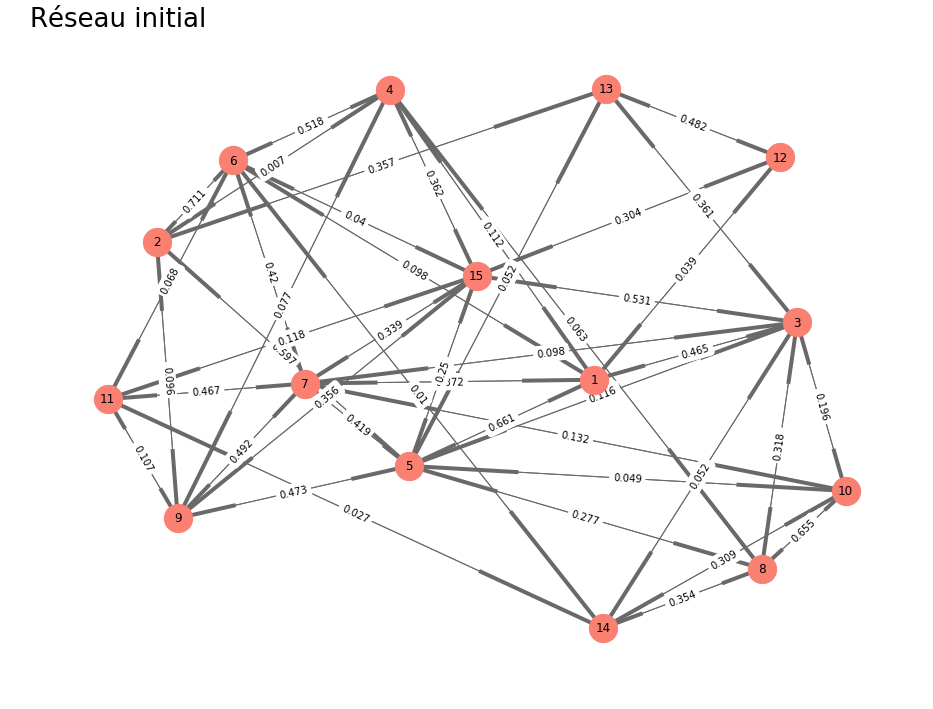

In [11]:
plot_graph(proba_interception)
plt.title("Réseau initial", size=26, loc="left")
plt.show()

Résolution du problème de sous-arbre recouvrant minimum avec un algorithme de Kruskal

In [12]:
# transformation des poids du graphe par w
weighted_graph = -np.log(1-proba_interception)

# conversion au format sparse
graph = csr_matrix(weighted_graph)

# résolution par Kruskal 
Tcsr = csgraph.minimum_spanning_tree(graph)

# conversion du résultat en numpy array
minimum_spanning_graph = Tcsr.toarray()

Extraction de la liste des arrêtes du sous-arbre recouvrant minimum et visualisation

In [13]:
to_highlight = []
for i, row in enumerate(minimum_spanning_graph):
        spy_i = str(i+1)
        reachable_spies = np.where(row>0)[0]
        for j in reachable_spies:
            spy_j = str(j+1)
            to_highlight += [(spy_i, spy_j)]
            to_highlight += [(spy_j, spy_i)]

/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

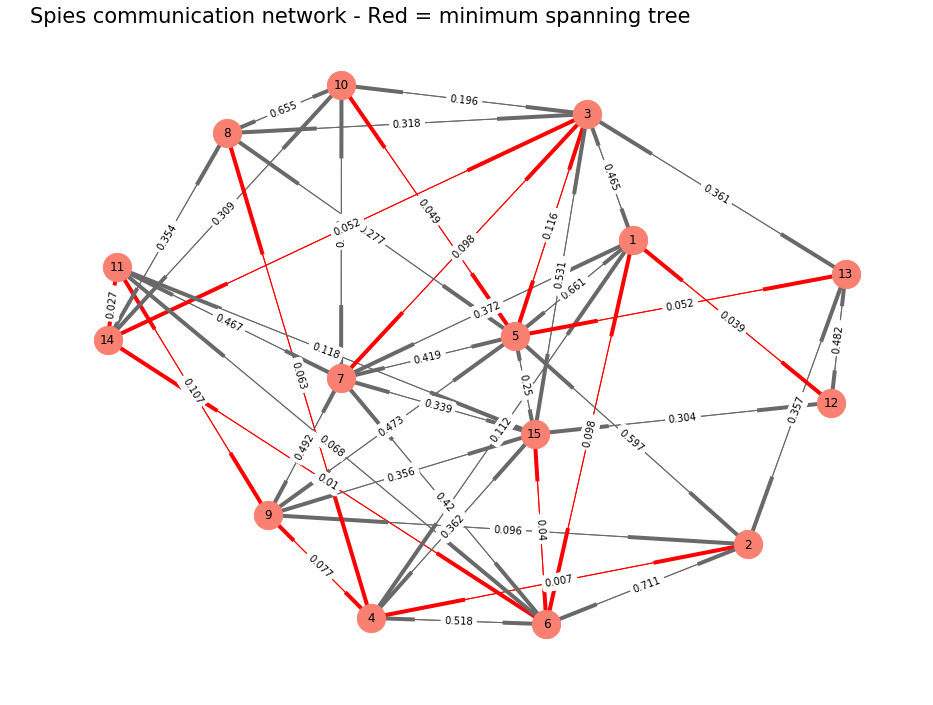

In [14]:
plot_graph(proba_interception, to_highlight=to_highlight)
plt.title("Spies communication network - Red = minimum spanning tree", size=21, loc="left")
plt.show()

Visualisation uniquement de l'arbre recouvrant minimum

/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/dieze/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/dieze/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

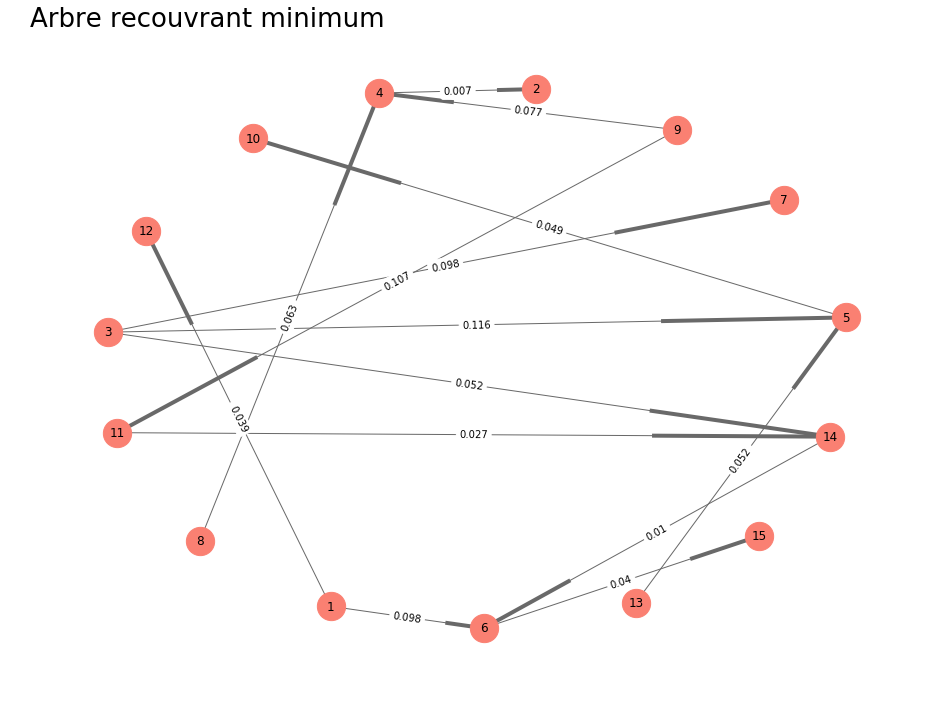

In [16]:
# Conversion des poids en probas d'interception
minimum_spanning_graph_proba = 1-np.exp(-minimum_spanning_graph)
# plot
plot_graph(minimum_spanning_graph_proba)
plt.title("Arbre recouvrant minimum", size=26, loc="left")
plt.show()

La probabilité d'interception est donné par :

$$ \mathbb{P}(interception) = 1-\mathbb{P}(\overline{interception}) = \mathbb{P}\left(\bigcap_{(i,j)\in E'} \overline{K_{ij}}\right) = \prod_{(i,j)\in E'}\mathbb{P}(\overline{K_{ij}}) = \prod_{(i,j)\in E'}(1-p_{ij})$$

Où $E'$ est la solution obtenu par l'algorithme de Kruskal

In [18]:
proba_interception_arbre_min = 1-np.prod(1-minimum_spanning_graph_proba[minimum_spanning_graph_proba>0])

print("Proba interception = ", round(proba_interception_arbre_min, 4))

Proba interception =  0.5809


$$ \mathbb{P}(interception) = 0.5809 $$